# DeepGaze IIE

In [1]:
# need to import torch before numpy
import torch
import numpy as np
from scipy.misc import face
from scipy.ndimage import zoom
from scipy.special import logsumexp


import deepgaze_pytorch

# DEVICE = 'cuda'
# mps is for MacM1chip GPU
DEVICE = 'cuda' if torch.cuda.is_available() else 'mps'

# you can use DeepGazeI or DeepGazeIIE
model = deepgaze_pytorch.DeepGazeIIE(pretrained=True).float().to(DEVICE)

image = face()

# load precomputed centerbias log density (from MIT1003) over a 1024x1024 image
# you can download the centerbias from https://github.com/matthias-k/DeepGaze/releases/download/v1.0.0/centerbias_mit1003.npy
# alternatively, you can use a uniform centerbias via `centerbias_template = np.zeros((1024, 1024))`.
centerbias_template = np.load('centerbias_mit1003.npy')
# rescale to match image size
centerbias = zoom(centerbias_template, (image.shape[0]/centerbias_template.shape[0], image.shape[1]/centerbias_template.shape[1]), order=0, mode='nearest')
# renormalize log density
centerbias -= logsumexp(centerbias)

image_tensor = torch.tensor([image.transpose(2, 0, 1)]).float().to(DEVICE)
centerbias_tensor = torch.tensor([centerbias]).float().to(DEVICE)
# image_tensor = torch.tensor([image.transpose(2, 0, 1)]).to(DEVICE)
# centerbias_tensor = torch.tensor([centerbias]).to(DEVICE)

log_density_prediction = model(image_tensor, centerbias_tensor)

/Users/yilunxing/opt/anaconda3/envs/mydeepgaze_env/lib/python3.9/site-packages/torchvision-0.17.1-py3.9-macosx-10.9-x86_64.egg/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/yilunxing/opt/anaconda3/envs/mydeepgaze_env/lib/python3.9/site-packages/torchvision-0.17.1-py3.9-macosx-10.9-x86_64.egg/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Loaded pretrained weights for efficientnet-b5


Using cache found in /Users/yilunxing/.cache/torch/hub/pytorch_vision_v0.6.0
/Users/yilunxing/opt/anaconda3/envs/mydeepgaze_env/lib/python3.9/site-packages/torchvision-0.17.1-py3.9-macosx-10.9-x86_64.egg/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Using cache found in /Users/yilunxing/.cache/torch/hub/pytorch_vision_v0.6.0
/Users/yilunxing/opt/anaconda3/envs/mydeepgaze_env/lib/python3.9/site-packages/torchvision-0.17.1-py3.9-macosx-10.9-x86_64.egg/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Re

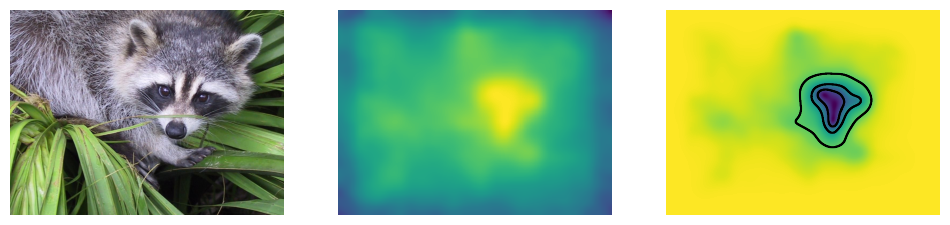

In [2]:
import matplotlib.pyplot as plt
from pysaliency.plotting import visualize_distribution

f, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
# f, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
axs[0].imshow(image)
axs[0].set_axis_off()
axs[1].matshow(log_density_prediction.detach().cpu().numpy()[0, 0])  # first image in batch, first (and only) channel
axs[1].set_axis_off()
visualize_distribution(log_density_prediction.detach().cpu().numpy()[0, 0], ax=axs[2])
axs[2].set_axis_off()

# DeepGaze III

In [4]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import face
from scipy.ndimage import zoom
from scipy.special import logsumexp


import deepgaze_pytorch

# DEVICE = 'cuda'
# mps is for MacM1chip GPU
DEVICE = 'cuda' if torch.cuda.is_available() else 'mps'

In [5]:
# you can use DeepGazeI or DeepGazeIIE
model = deepgaze_pytorch.DeepGazeIII(pretrained=True).float().to(DEVICE)

image = face()

# location of previous scanpath fixations in x and y (pixel coordinates), starting with the initial fixation on the image.
fixation_history_x = np.array([1024//2, 300, 500, 200, 200, 700])
fixation_history_y = np.array([768//2, 300, 100, 300, 100, 500])

# load precomputed centerbias log density (from MIT1003) over a 1024x1024 image
# you can download the centerbias from https://github.com/matthias-k/DeepGaze/releases/download/v1.0.0/centerbias_mit1003.npy
# alternatively, you can use a uniform centerbias via `centerbias_template = np.zeros((1024, 1024))`.
centerbias_template = np.load('centerbias_mit1003.npy')
# rescale to match image size
centerbias = zoom(centerbias_template, (image.shape[0]/centerbias_template.shape[0], image.shape[1]/centerbias_template.shape[1]), order=0, mode='nearest')
# renormalize log density
centerbias -= logsumexp(centerbias)

image_tensor = torch.tensor([image.transpose(2, 0, 1)]).float().to(DEVICE)
centerbias_tensor = torch.tensor([centerbias]).float().to(DEVICE)
x_hist_tensor = torch.tensor([fixation_history_x[model.included_fixations]]).float().to(DEVICE)
y_hist_tensor = torch.tensor([fixation_history_y[model.included_fixations]]).float().to(DEVICE)

log_density_prediction = model(image_tensor, centerbias_tensor, x_hist_tensor, y_hist_tensor)



Using cache found in /Users/yilunxing/.cache/torch/hub/pytorch_vision_v0.6.0
/Users/yilunxing/opt/anaconda3/envs/mydeepgaze_env/lib/python3.9/site-packages/torchvision-0.17.1-py3.9-macosx-10.9-x86_64.egg/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/yilunxing/opt/anaconda3/envs/mydeepgaze_env/lib/python3.9/site-packages/torchvision-0.17.1-py3.9-macosx-10.9-x86_64.egg/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/var/folders/zt/0sjlqcss6017rh66yvnwlwqm0000gn/T/ipykernel_23373/270211042.py:4: DeprecationWarning: scipy.misc.face has

tensor([[618, 651, 584, 625]], device='mps:0')

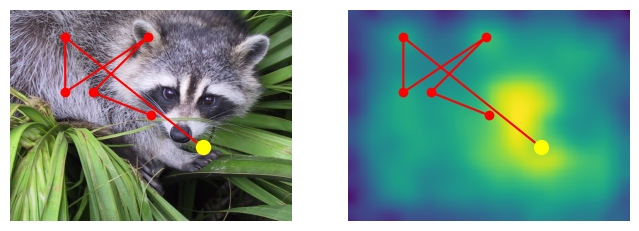

In [6]:
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
axs[0].imshow(image)
axs[0].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
axs[0].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
axs[0].set_axis_off()
axs[1].matshow(log_density_prediction.detach().cpu().numpy()[0, 0])  # first image in batch, first (and only) channel
axs[1].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
axs[1].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
axs[1].set_axis_off()

In [16]:
face().dtype

/var/folders/zt/0sjlqcss6017rh66yvnwlwqm0000gn/T/ipykernel_10626/3613209220.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face().dtype


dtype('uint8')

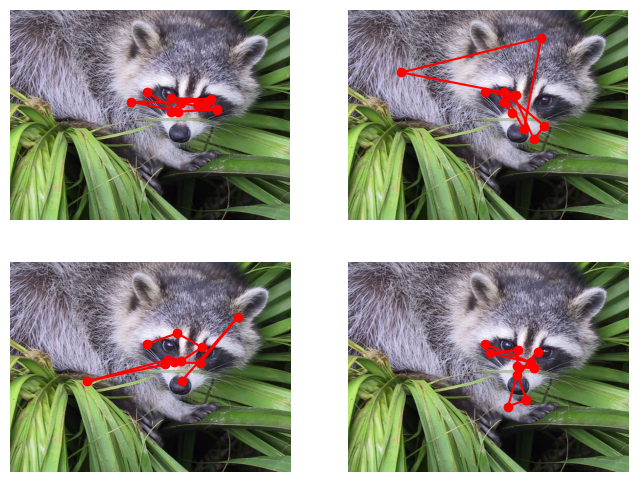

In [7]:
from pysaliency.models import sample_from_logdensity

def get_fixation_history(fixation_coordinates, model):
    history = []
    for index in model.included_fixations:
        try:
            history.append(fixation_coordinates[index])
        except IndexError:
            history.append(np.nan)
    return history


f, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

rst = np.random.RandomState(seed=23)

for ax in axs.flatten():
    fixations_x = [500]
    fixations_y = [300]

    for i in range(10):
        x_hist = get_fixation_history(fixations_x, model)
        y_hist = get_fixation_history(fixations_y, model)

        
        x_hist_tensor = torch.tensor([x_hist]).float().to(DEVICE)
        y_hist_tensor = torch.tensor([y_hist]).float().to(DEVICE)
        log_density_prediction = model(image_tensor, centerbias_tensor, x_hist_tensor, y_hist_tensor)
        logD = log_density_prediction.detach().cpu().numpy()[0, 0]
        next_x, next_y = sample_from_logdensity(logD, rst=rst)

        fixations_x.append(next_x)
        fixations_y.append(next_y)

    ax.imshow(image)
    ax.plot(fixations_x, fixations_y, 'o-', color='red')
    ax.set_axis_off()

In [8]:
model.included_fixations

[-1, -2, -3, -4]